Чтобы сдать задание, выполните следующую последовательность действий.

1. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.
2. Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.
4. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.
5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.
6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.
7. Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив и загрузите его в форму (html облегчит задачу проверки вашим рецензентам — в ipynb динамические карты часто не сохраняются, а для выполнения кода рецензентам придётся устанавливать все библиотеки).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle
import folium
import json
import geojson
from folium import plugins
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Загрузка данных и подсчёт

In [2]:
with open('regions_week1.pkl', 'rb') as reg_week_1:
    regions = pickle.load(reg_week_1)

In [3]:
ny_coordinates = [[ -74.25559, -73.70001],[40.91553, 40.49612]]
NY_west = ny_coordinates[0][0]
NY_east = ny_coordinates[0][1]
NY_north = ny_coordinates[1][0]
NY_south =  ny_coordinates[1][1]
ESB_long = -73.985664
ESB_lat  =  40.748441
SoL_lat = 40.6892776
SoL_long= -74.0445938

Общее количество поездок такси из каждой географической зоны

In [4]:
regions['sum_trips'] = regions[list(regions.iloc[:,5:])].sum(axis=1)
print(regions.sum_trips)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2495    0.0
2496    0.0
2497    0.0
2498    0.0
2499    0.0
Name: sum_trips, Length: 2500, dtype: float64


Количество ячеек с 0 поездок

In [5]:
print('Количество ячеек с 0 поездок:', sum(regions.sum_trips == 0))

Количество ячеек с 0 поездок: 1283


## 2. Статическая карта

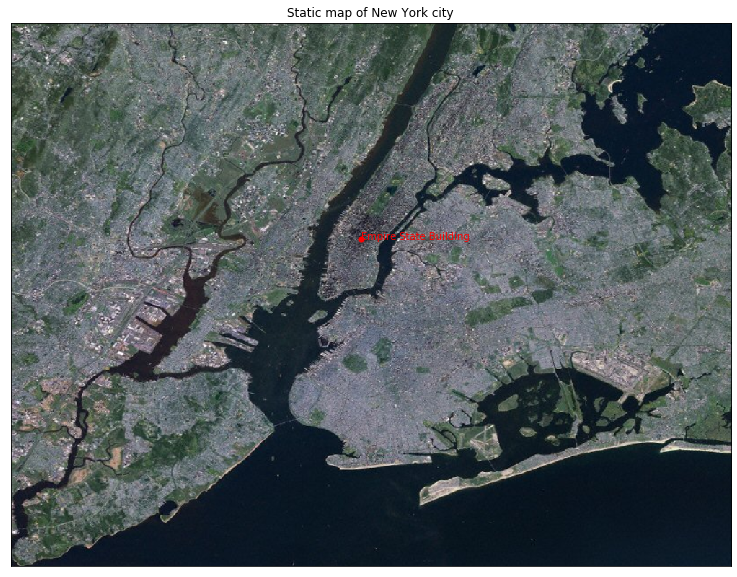

In [6]:
plt.figure(figsize=(15,10))

static_map = Basemap(llcrnrlat=NY_south, llcrnrlon=NY_west, 
                     urcrnrlat=NY_north, urcrnrlon=NY_east,
                     resolution='f',projection='lcc',
                     lat_0=(NY_north+NY_south)/2, 
                     lon_0=(NY_west+NY_east)/2, epsg=4326)

static_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=1000)
#static_map.arcgisimage(service='World_Street_Map', xpixels=1000)

x,y = static_map(ESB_long, ESB_lat)
plt.plot(x,y, 'ok', markersize=5, color='red')
plt.text(x,y, 'Empire State Building', fontsize=10, color='red')
plt.title('Static map of New York city')
plt.show()
#plot_map(service='ESRI_StreetMap_World_2D')

## 3. Тепловая карта

In [46]:
vmax=regions.sum_trips.min(axis=0)
vmin=regions.sum_trips.max(axis=0)
summ = regions.sum_trips

In [30]:
heat_lon= np.unique(regions[['west','east']])
heat_lat=np.unique(regions[['north','south']])
lon, lat = np.meshgrid(heat_lon,heat_lat)

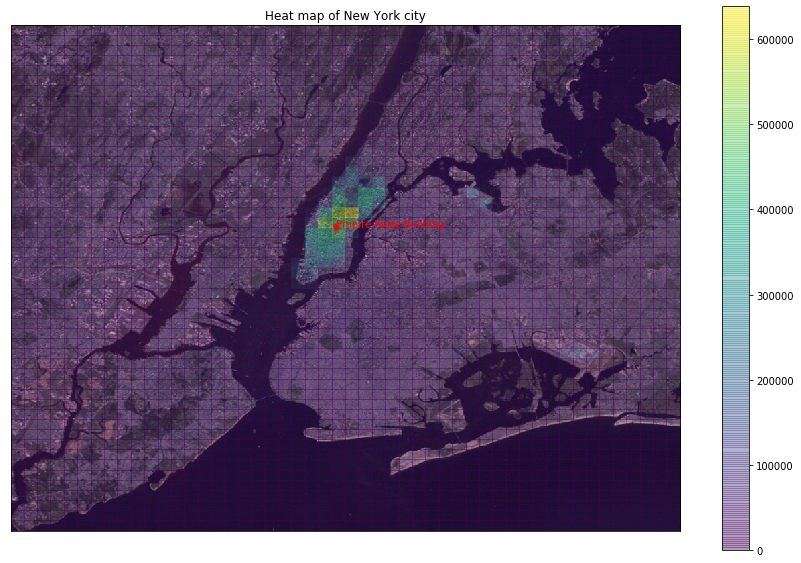

In [53]:
plt.figure(figsize=(15,10))

heat_map = Basemap(llcrnrlat=NY_south, llcrnrlon=NY_west, 
                     urcrnrlat=NY_north, urcrnrlon=NY_east,
                     resolution='f',projection='lcc',
                     lat_0=(NY_north+NY_south)/2, 
                     lon_0=(NY_west+NY_east)/2, epsg=4326)

heat_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=1000)
#static_map.arcgisimage(service='World_Street_Map', xpixels=1000)
heat_map.pcolormesh(lon,lat,summ.values.reshape(50,50).transpose(),
                    vmax=vmax,vmin=vmin, alpha=0.4,latlon=True)
plt.colorbar()
x,y = heat_map(ESB_long, ESB_lat)
plt.plot(x,y, 'ok', markersize=5, color='red')
plt.text(x,y, 'Empire State Building', fontsize=10, color='red')
plt.title('Heat map of New York city')

#heat_map.scatter(regions.sum_trips, regions.region,s=1)
plt.show()

## 4. Интерактивная карта 

In [55]:
interactive_map = folium.Map(location=[(NY_north+NY_south)/2.,(NY_west+NY_east)/2.], 
                             titles='cartodbpositron', 
                             zoom_start=11,
                             control_scale=True)
folium.Marker(location=[SoL_lat,SoL_long], 
              popup='State of Liberty',
             icon=folium.Icon(color='green')).add_to(interactive_map)
interactive_map

## 5. Тепловая интерактивная карта

In [72]:
mean_trips = regions.sum_trips.values/len(regions.iloc[0,5:-1])
regions['mean_trips'] = mean_trips

In [76]:
# coordinate to json converter with multopilygon geojson
#https://gis.stackexchange.com/questions/220997/pandas-to-geojson-multiples-points-features-with-python
def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
        geojson.Feature(geometry = geojson.Polygon([[(X['west'], X['south']),
                                                     (X['east'], X['south']),
                                                     (X['east'], X['north']),
                                                     (X['west'], X['north'])]]),
                        id = str(X.name)))
    df.apply(insert_features, axis = 1)
    feature_collection = geojson.FeatureCollection(features)
    dumps = geojson.dumps(feature_collection)
    return geojson.loads(dumps)

In [266]:
geo_data_json = data2geojson(regions.iloc[:,1:5])

In [250]:
# coord = regions.iloc[:,0:5]
# coord.set_index('region',inplace=True)
# coord.apply(lambda x: x*pi/180.)
# geo_data_json = data2geojson(coord)

In [212]:
df = pd.DataFrame(regions.mean_trips.values,columns=['value'])
df['id']=regions.region.values

In [270]:
df.value.max()

858.6008064516129

In [301]:
interactive_heat_map = folium.Map(location=[(NY_north+NY_south)/2.,(NY_west+NY_east)/2.], 
                             titles='cartodbpositron', 
                             zoom_start=11,
                             control_scale=True)
folium.Marker(location=[SoL_lat,SoL_long], 
              popup='State of Liberty',
             icon=folium.Icon(color='green')).add_to(interactive_heat_map)
folium.Marker(location=[ESB_lat,ESB_long], 
              popup='Empire State Building',
             icon=folium.Icon()).add_to(interactive_heat_map)

folium.Choropleth(
    geo_data=geo_data_json,
    data=df.value,
    columns=['id','value'],
    key_on='id',
    fill_color = 'OrRd',
    legend_name = 'Mean trips on hours',
    nan_fill_opacity=0,
    fill_opacity=0.75,
    line_opacity=0.2).add_to(interactive_heat_map)

folium.LayerControl().add_to(interactive_heat_map)
interactive_heat_map

К сожалению, здесь явный баг folium. Ячейки считаны верно(если отдалить сетка видна отлично), средние значения тоже(по шкале видны минимум и максимум, что при проверке(df.value.max()) максимальные значения совпадает)

## Фильтрация ячеек

In [291]:
print('Количество ячеек с поездками больше 5:', (regions.mean_trips >= 5).sum())

Количество ячеек с поездками больше 5: 102


In [305]:
interactive_heat_map2 = folium.Map(location=[(NY_north+NY_south)/2.,(NY_west+NY_east)/2.], 
                             titles='cartodbpositron', 
                             zoom_start=11,
                             control_scale=True)
# folium.Marker(location=[SoL_lat,SoL_long], 
#               popup='State of Liberty',
#              icon=folium.Icon(color='green')).add_to(interactive_heat_map)
# folium.Marker(location=[ESB_lat,ESB_long], 
#               popup='Empire State Building',
#              icon=folium.Icon()).add_to(interactive_heat_map)

folium.Choropleth(
    geo_data=geo_data_json,
    data=df[df.value >= 5],
    columns=['id','value'],
    key_on='id',
    fill_color = 'OrRd',
    legend_name = 'Mean trips on hours more then 5',
    nan_fill_opacity=0,
    fill_opacity=0.7,
    line_opacity=0.2).add_to(interactive_heat_map2)

folium.LayerControl().add_to(interactive_heat_map2)
interactive_heat_map2

Так же имеется баг. По шкале наверху видно, что ячейки начинаются с 5.

In [308]:
# import os
# os.system('jupyter nbconvert --to html taxi_week2.ipynb')

-1

In [311]:
regions.mean_trips.max()

858.6008064516129

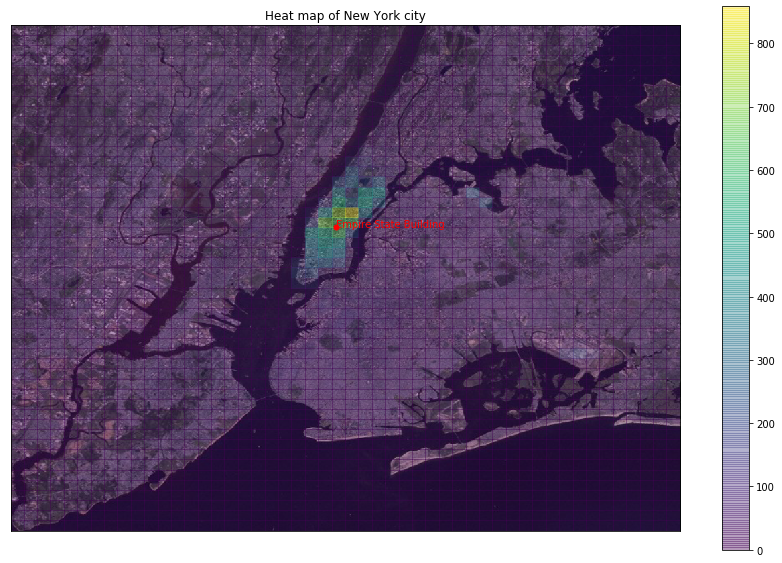

In [312]:
plt.figure(figsize=(15,10))

heat_map = Basemap(llcrnrlat=NY_south, llcrnrlon=NY_west, 
                     urcrnrlat=NY_north, urcrnrlon=NY_east,
                     resolution='f',projection='lcc',
                     lat_0=(NY_north+NY_south)/2, 
                     lon_0=(NY_west+NY_east)/2, epsg=4326)

heat_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=1000)
#static_map.arcgisimage(service='World_Street_Map', xpixels=1000)
heat_map.pcolormesh(lon,lat,df.value.values.reshape(50,50).transpose(),
                    vmax=regions.mean_trips.max(),vmin=regions.mean_trips.min(), alpha=0.4,latlon=True)
plt.colorbar()
x,y = heat_map(ESB_long, ESB_lat)
plt.plot(x,y, 'ok', markersize=5, color='red')
plt.text(x,y, 'Empire State Building', fontsize=10, color='red')
plt.title('Heat map of New York city')

#heat_map.scatter(regions.sum_trips, regions.region,s=1)
plt.show()

In [315]:
with open('regions_week2.pkl','wb') as fl:
    pickle.dump(regions, fl)